<a href="https://colab.research.google.com/github/Cansuuzum-38/Detection-of-Alzheimer-Disease/blob/main/tubitak_csb_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = pds.read_csv("TEST_ADNIsurvexcel_Selim_FAQ_6.csv", encoding=('ISO-8859-1'))

In [ ]:
data.shape

(388, 14)

In [ ]:
data['PTGENDER']=data['PTGENDER'].map({'Male':1,'Female':0})

In [ ]:
#Son
import pandas as pds
import numpy as npy
import matplotlib.pyplot as pyt
import math as mat
from warnings import filterwarnings
filterwarnings('ignore')
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
data['PTRACCAT']=data['PTRACCAT'].map({'White':0,'Black':1,'Asian':2})

In [ ]:
data['DX']=data['DX'].map({'Dementia':1, 'MCI':0 })

In [ ]:
data['PTETHCAT']=data['PTETHCAT'].map({'Not Hisp/Latino':0, 'Hisp/Latino':1 })

In [ ]:
data.drop('EXAMDATE', axis=1 ,inplace=True)

In [ ]:
data.drop('PTID', axis=1 ,inplace=True)

In [ ]:
data.drop('PTRACCAT', axis=1 ,inplace=True)

In [ ]:
data.drop('RID', axis=1 ,inplace=True)

In [ ]:
data.drop('APOE4', axis=1 ,inplace=True)

In [ ]:
data.drop('EventTime', axis=1 ,inplace=True)

In [ ]:
data.drop('Standardise FAQ', axis=1 ,inplace=True)

In [ ]:
data.drop('PTMARRY', axis=1 ,inplace=True)

In [ ]:
#PTETHCAT 3 null var doldur.

In [ ]:
data.isnull().sum()

AGE         0
PTGENDER    0
PTEDUCAT    0
PTETHCAT    3
SITE        0
DX          0
cens        0
dtype: int64

In [ ]:
type(data['PTETHCAT'])

pandas.core.series.Series

In [ ]:
data['PTMARRY']=data['PTMARRY'].map({'Married':0,'Never married':1,'Widowed':2,'Divorced':3})

In [ ]:
data.isnull().sum().sum()

3

In [ ]:
data[data.isnull().any(axis=1)]

,AGE,PTGENDER,PTEDUCAT,PTETHCAT,SITE,DX,cens
149,68.4,0,20,NaN,128,0,0
353,71.7,0,12,NaN,121,0,0
359,71.6,0,18,NaN,121,0,1


In [ ]:
data['PTETHCAT'].fillna(0,inplace = True)

In [ ]:
data[data.isnull().any(axis=1)]

,AGE,PTGENDER,PTEDUCAT,PTETHCAT,SITE,DX,cens


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop('DX',  axis =1)

In [ ]:
y = data['DX']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Tek tabanlı Algoritmalar

# KNN Model-Predict

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier().fit(x_train, y_train)

In [ ]:
knn_model

KNeighborsClassifier()

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_model.n_neighbors

5

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9615384615384616

In [ ]:
# ?knn_model

# KNN Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {'n_neighbors': npy.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params)

In [ ]:
knn_cv_model.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 4}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#knn_tuned = KNeighborsClassifier(knn_cv_model.best_params_["n_neighbors"])
knn_tuned = knn.fit(x_train,y_train)

In [ ]:
y_pred = knn_tuned.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9615384615384616

In [ ]:
# diğer parametreler için hiperparametre seçimi nasıl yapılır.

# KNN Performans Ölçüm Metrikleri

In [ ]:
print("Doğruluk : ", accuracy_score(y_test,y_pred))

Doğruluk :  0.9615384615384616


In [ ]:
print("Duyarlılık : ", recall_score(y_test,y_pred))

Duyarlılık :  0.0


In [ ]:
print("Kesinlik : ", precision_score(y_test,y_pred))

Kesinlik :  0.0


# KNN  Cross Validation

In [ ]:
print('Model Degerlendirme')

# evaluate model
scores_knn = cross_val_score(knn,x_train, y_train, cv=10)
print(scores_knn)


Model Degerlendirme
[1.         1.         1.         0.96774194 1.         1.
 1.         0.96774194 0.96774194 0.93548387]


# SVM Model - Tahmin

In [ ]:
svm_model = SVC(kernel = "linear").fit(x_train,y_train)

In [ ]:
svm_model

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9615384615384616

# SVM Model Tuning

In [ ]:
 # ?svm_model

In [ ]:
svc_params = {"C" : npy.arange(1,10)}

In [ ]:
svc = SVC(kernel = "linear")

In [ ]:
svc_cv_model =  GridSearchCV(svc, svc_params, cv = 10, n_jobs = -1, verbose = 2 )

In [ ]:
svc_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [ ]:
svc_cv_model

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [ ]:
svc_cv_model.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
svc_cv_model.best_params_

{'C': 1}

In [ ]:
# optimum parametre ile model oluşturma

In [ ]:
svc_model_tuned = SVC(kernel = "linear", C =1).fit(x_train,y_train)

In [ ]:
y_tuned_pred = svc_model_tuned.predict(x_test)

In [ ]:
accuracy_score(y_test,y_tuned_pred)

0.9615384615384616

# SVC Performans Ölçüm Metrikleri

In [ ]:
print("Doğruluk : ", accuracy_score(y_test,y_pred))

Doğruluk :  0.9615384615384616


In [ ]:
print("Duyarlılık : ", recall_score(y_test,y_pred))

Duyarlılık :  0.0


In [ ]:
print("Kesinlik : ", precision_score(y_test,y_pred))

Kesinlik :  0.0


# SVC Cross Validation

In [ ]:
print('Model Degerlendirme')

# evaluate model
scores_svc = cross_val_score(knn,x_train, y_train, cv=10)
print(scores_svc)


Model Degerlendirme
[1.         1.         1.         0.96774194 1.         1.
 1.         0.96774194 0.96774194 0.93548387]


# Torbalama Algoritmaları

# Random Forest Model - Tahmin

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier().fit(x_train,y_train)

In [ ]:
# ccp_alpha : ağaç dallarının budanmasını kontrol etmek için kullanılır.
rf_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [ ]:
rf_pred = rf_model.predict(x_test)

In [ ]:
accuracy_score(y_test ,y_pred )

0.9615384615384616

In [ ]:
 # ?rf_model

#  Model Tuning

In [ ]:
rf_params = {"max_depth" : [2,5,8,10],
             "max_features":[2,5,8],
             "n_estimators": [10,20,50,100,200,300,400,500,1000],
             "min_samples_split":[2,5,10],
              "criterion" : ['gini','entropy'],
             'min_samples_leaf': [1, 3, 5, 8],
             'max_leaf_nodes' : [2, 4, 6, 8],
             'random_state' : [20, 30, 42, 50],
             'ccp_alpha' : [3, 5, 7, 10]

            }

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2 )
rf_cv_model = RandomizedSearchCV(rf_model,rf_params,cv =10,verbose = 0)
rf_cv_model.fit(x_train,y_train)
rf_cv_model.best_params_

{'random_state': 50,
 'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 8,
 'max_features': 5,
 'max_depth': 2,
 'criterion': 'gini',
 'ccp_alpha': 5}

In [ ]:
rf_cv_model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': [3, 5, 7, 10],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10],
                                        'max_features': [2, 5, 8],
                                        'max_leaf_nodes': [2, 4, 6, 8],
                                        'min_samples_leaf': [1, 3, 5, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         300, 400, 500, 1000],
                                        'random_state': [20, 30, 42, 50]})

In [ ]:
rf_cv_model.best_params_

{'random_state': 42,
 'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 2,
 'max_features': 8,
 'max_depth': 2,
 'criterion': 'entropy',
 'ccp_alpha': 10}

In [ ]:
rf_tuned = RandomForestClassifier(criterion='gini',max_depth = 2,max_features=5,min_samples_split=5,n_estimators=10)

In [ ]:
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=5, min_samples_split=5,
                       n_estimators=10)

In [ ]:
y_pred =rf_tuned.predict(x_test)

# RF Performans Ölçüm Metrikleri

In [ ]:
print("Doğruluk : ", accuracy_score(y_test,y_pred))

Doğruluk :  0.9615384615384616


In [ ]:
print("Duyarlılık : ", recall_score(y_test,y_pred))

Duyarlılık :  0.0


In [ ]:
print("Kesinlik : ", precision_score(y_test,y_pred))

Kesinlik :  0.0


# RF Cross Validation

In [ ]:
# evaluate model
scores_rf = cross_val_score(knn,x_train, y_train, cv=10)
print(scores_rf)


[1.         1.         1.         0.96774194 1.         1.
 1.         0.96774194 0.96774194 0.93548387]


# Decision Tree Model - Predict

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cart = DecisionTreeClassifier(max_depth = 4)

In [ ]:
cart_model = cart.fit(x_train,y_train)

In [ ]:
y_pred = cart_model.predict(x_test)

# Model Tuning

In [ ]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
cart_params = {"max_depth":range(1,10),
               "min_samples_split" : list(range(2,50))
              }

In [ ]:
cart = DecisionTreeClassifier()

In [ ]:
cart_cv = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
cart_cv_model = cart_cv.fit(x_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [ ]:
print("en iyi parametreler:" + str(cart_cv_model.best_params_))

en iyi parametreler:{'max_depth': 8, 'min_samples_split': 4}


# Final Model

In [ ]:
cart = DecisionTreeClassifier(max_depth = 1,min_samples_split = 2)

In [ ]:
cart_tuned = cart.fit(x_train,y_train)

In [ ]:
y_pred = cart_tuned.predict(x_test)

# DT Performans Ölçüm Metrikleri

In [ ]:
print("Doğruluk : ", accuracy_score(y_test,y_pred))

Doğruluk :  0.9615384615384616


In [ ]:
print("Duyarlılık : ", recall_score(y_test,y_pred))

Duyarlılık :  0.0


In [ ]:
print("Kesinlik : ", precision_score(y_test,y_pred))

Kesinlik :  0.0


#  DT Cross Validation

In [ ]:
# evaluate model
scores_dt = cross_val_score(cart,x_train, y_train, cv=10)
print(scores_dt)


[1.         1.         1.         1.         1.         1.
 1.         0.96774194 0.96774194 0.96774194]


# Artırma Algoritmaları

# XGBoost Model - Predict

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier().fit(x_train,y_train)

In [ ]:
#y_pred = xgb_model.predict(y_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9615384615384616

# XGBoost Model Tuning

In [ ]:
?xgb_model

In [ ]:
xgb_params = {
    'n_estimators': [100, 500, 1000, 2000],
    'subsample' : [0.6, 0.8, 1.0],
    'max_depth' : [3, 4, 5, 6],
    'learning_rate' : [0.1, 0.01, 0.02, 0.05],
    'min_samples_split' : [2, 5, 10],
    'cv' : [3, 5, 7, 10],
    'n_jobs' : [1, 2, 4, 8],  # Negative values are not appropriate, changed to positive
    'verbose' : [0, 1, 2]  # Adjusted verbose values
}

# XGBoost Performans Ölçüm Metrikleri

In [ ]:
print("Doğruluk : ", accuracy_score(y_test,y_pred))

Doğruluk :  0.9615384615384616


In [ ]:
print("Duyarlılık : ", recall_score(y_test,y_pred))

Duyarlılık :  0.0


In [ ]:
print("Kesinlik : ", precision_score(y_test,y_pred))

Kesinlik :  0.0


# XGBoost Cross Validation

In [ ]:
# evaluate model
scores_xgb = cross_val_score(xgb, x_train, y_train, cv = 10)
print(scores_xgb)

[1.         1.         1.         1.         1.         1.
 1.         0.96774194 0.96774194 0.96774194]


# Level-1

# YSA Model - Predict

In [ ]:
# YSA Model oluşturma.Argüman girmeden modeli çalıştırma.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Modeli fit etme.
mlpc = MLPClassifier().fit(x_train, y_train)

In [ ]:
y_pred = mlpc.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9615384615384616

# YSA Model Tuning

In [ ]:
#?mlpc

In [ ]:
mlpc_params = { "alpha" : [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               "hidden_layer_sizes" : [(10,10,10),
                                       (100,100,100),
                                       (100,100),
                                       (3,5),
                                       (5,3)],
               "solver" : ["lbfgs", "adam", "sgd"],
               "activation" : ["relu", "logistic"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                          cv = 10,
                           n_jobs = -1,
                           verbose = 2)


In [ ]:
mlpc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [ ]:
print("En iyi parametreler :" + str(mlpc_cv_model.best_params_))

En iyi parametreler :{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}


In [ ]:
#Hiperparametreler ile model oluşturma
mlpc_tuned = MLPClassifier(activation = "relu",
                           alpha = 0.1,
                           hidden_layer_sizes = (3, 5),
                           solver = "lbfgs")

In [ ]:
# Modeli fit etme
mlpc_tuned.fit(x_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(3, 5), solver='lbfgs')

In [ ]:
y_pred = mlpc_tuned.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9615384615384616

# AdaBoost Model - Test

In [ ]:
import pandas

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
import random
seed = 42  # Örnek bir değer ataması
random.seed(seed)
num_trees = 10
AdaBoost = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [ ]:
# Model train

In [ ]:
model=AdaBoost.fit(x_train, y_train)

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
AdaBoostscore= model_selection.cross_val_score(model, x, y, cv=kfold)
print(AdaBoostscore)

[0.97435897 0.98717949 1.         0.96103896 0.97402597]


In [ ]:
means = AdaBoostscore.mean()
print(means)

0.9793206793206795


In [ ]:
# test
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics

# Accuracy değeri
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
from sklearn import metrics
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.33      0.50         3

    accuracy                           0.97        78
   macro avg       0.99      0.67      0.74        78
weighted avg       0.98      0.97      0.97        78



<Axes: title={'center': 'AdaBoost Arttırma Topluluk Öğrenme Modeli için Karışıklık Matrisi'}, xlabel='Predicted label', ylabel='True label'>

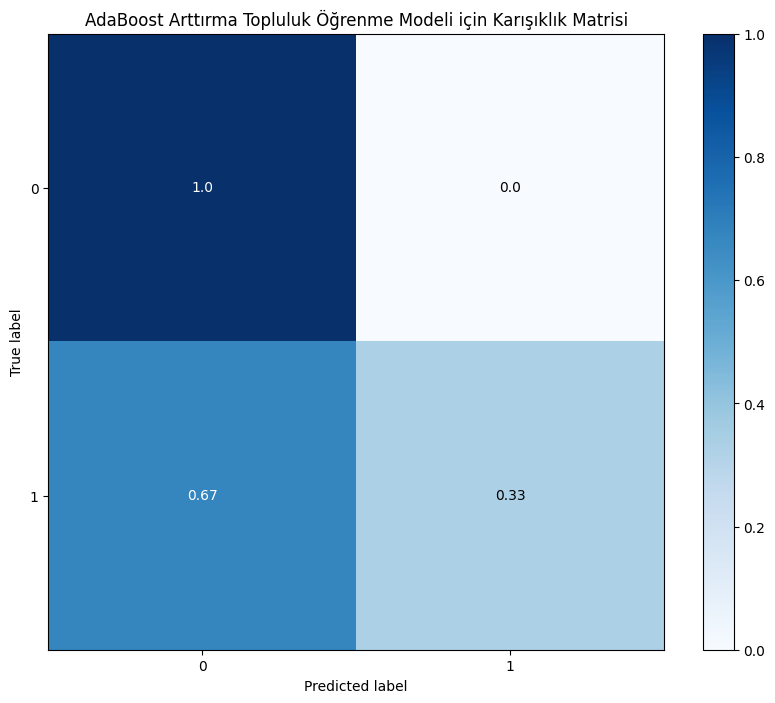

In [ ]:
!pip install scikit-plot
import scikitplot as skplt


#confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred,
    normalize=True,
    title="AdaBoost Arttırma Topluluk Öğrenme Modeli için Karışıklık Matrisi",
    figsize=(10, 8),
)



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

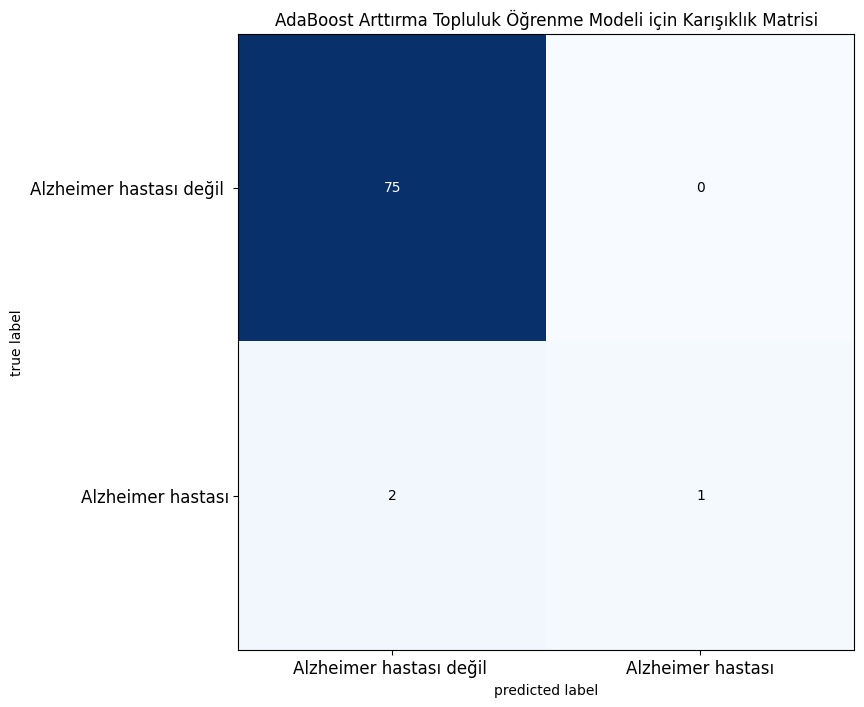

In [ ]:
import matplotlib.pyplot as plt

plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("AdaBoost Arttırma Topluluk Öğrenme Modeli için Karışıklık Matrisi")
plt.xticks(range(2), ["Alzheimer hastası değil ","Alzheimer hastası"], fontsize=12)
plt.yticks(range(2), ["Alzheimer hastası değil ","Alzheimer hastası"], fontsize=12)
plt.show()

<Axes: title={'center': 'AdaBoost Arttırma Topluluk Öğrenme Modeli için ROC Eğrisi'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

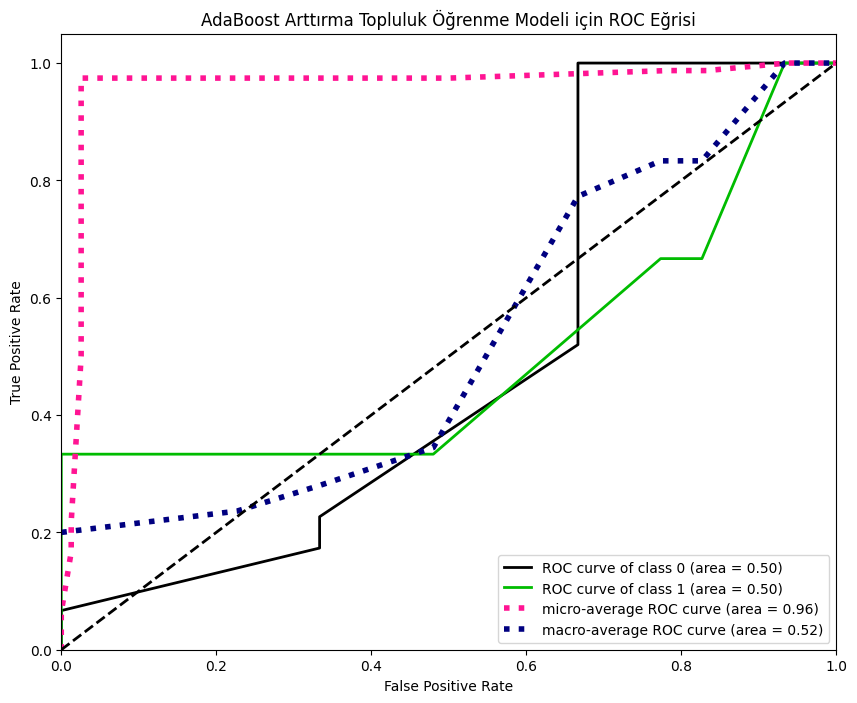

In [ ]:
y_probas = model.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test, y_probas, title="AdaBoost Arttırma Topluluk Öğrenme Modeli için ROC Eğrisi", figsize=(10, 8)
)


<Axes: title={'center': 'AdaBoost Arttırma Topluluk Öğrenme Modeli için Kesinlik Duyarlılık Eğrisi'}, xlabel='Recall', ylabel='Precision'>

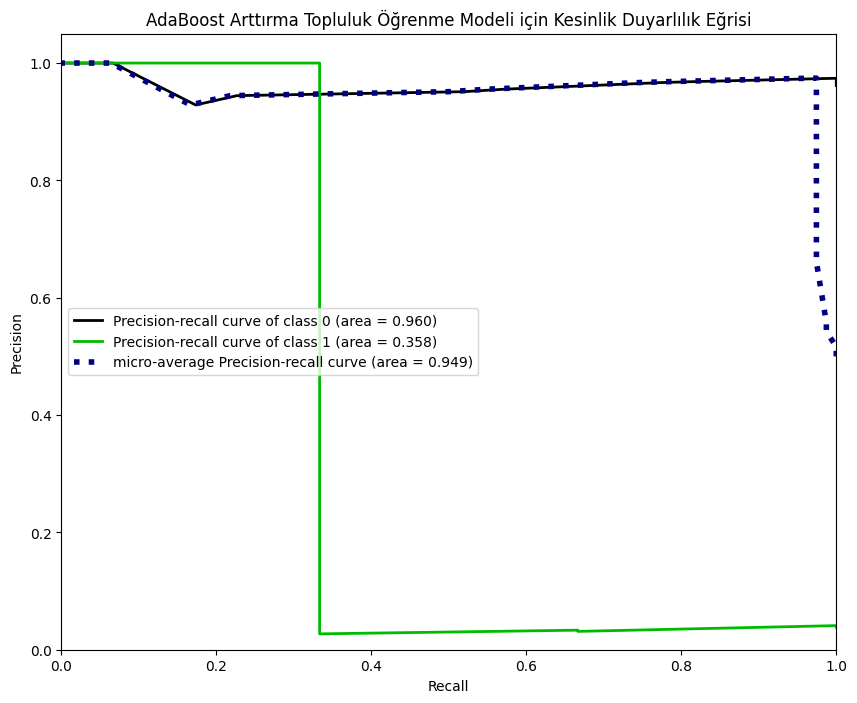

In [ ]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, title="AdaBoost Arttırma Topluluk Öğrenme Modeli için Kesinlik Duyarlılık Eğrisi", figsize=(10, 8)
)

# Stack Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Tahmin Yapma
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)


In [ ]:
from sklearn.metrics import matthews_corrcoef
knn_train_accuracy=accuracy_score(y_train,y_train_pred)
knn_train_mcc=matthews_corrcoef(y_train,y_train_pred)                #calculate mcc
knn_train_f1=f1_score(y_train,y_train_pred,average="weighted")      #calculate f1 score

In [ ]:
knn_test_accuracy=accuracy_score(y_test,y_test_pred)
knn_test_mcc=matthews_corrcoef(y_test,y_test_pred)               #calculate mcc
knn_test_f1=f1_score(y_test,y_test_pred,average="weighted")

In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , knn_train_accuracy)
print("MCC : " , knn_train_mcc)
print("F1 Score: " , knn_test_f1)



Eğitim verisiyle model performansı 
Accuarcy  0.9903225806451613
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:

print("Test verisiyle model performansı ")
print("Accuarcy " , knn_test_accuracy)
print("MCC : " , knn_test_mcc)
print("F1 Score: " , knn_test_f1)



Test verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:
#SVM
from sklearn.svm import SVC

svm_rbf=SVC(gamma=2,C=1)
svm_rbf.fit(x_train,y_train)


SVC(C=1, gamma=2)

In [ ]:
#Tahmin Yapma
y_train_pred=svm_rbf.predict(x_train)
y_test_pred=svm_rbf.predict(x_test)



In [ ]:
svm_rbf_train_accuarcy=accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc=matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1 = f1_score(y_train, y_train_pred)

In [ ]:
svm_rbf_test_accuracy=accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc=matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1=f1_score(y_test,y_test_pred, average="weighted")



In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , svm_rbf_test_accuracy)
print("MCC : " , svm_rbf_train_mcc)
print("F1 Score: " , svm_rbf_train_f1)


Eğitim verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  1.0
F1 Score:  1.0


In [ ]:
print("Test verisiyle model performansı ")
print("Accuarcy " , svm_rbf_test_accuracy)
print("MCC : " , svm_rbf_test_mcc)
print("F1 Score: " , svm_rbf_test_f1)


Test verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:
# DT
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [ ]:
# Tahmin Yapma
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)


In [ ]:
dt_train_accuracy=accuracy_score(y_train,y_train_pred)
dt_train_mcc=matthews_corrcoef(y_train,y_train_pred)
dt_train_f1=f1_score(y_train,y_train_pred, average="weighted")

In [ ]:
dt_test_accuracy=accuracy_score(y_test,y_test_pred)
dt_test_mcc=matthews_corrcoef(y_test,y_test_pred)
dt_test_f1=f1_score(y_test,y_test_pred, average="weighted")


In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , dt_train_accuracy)
print("MCC : " , dt_train_mcc)
print("F1 Score: " , dt_train_f1)



Eğitim verisiyle model performansı 
Accuarcy  1.0
MCC :  1.0
F1 Score:  1.0


In [ ]:

print("Test verisiyle model performansı ")
print("Accuarcy " , dt_test_accuracy)
print("MCC : " , dt_test_mcc)
print("F1 Score: " , dt_test_f1)


Test verisiyle model performansı 
Accuarcy  0.9743589743589743
MCC :  0.5698028822981897
F1 Score:  0.9681174089068825


In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
# Tahmin Yapma
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)


In [ ]:

rf_train_accuracy=accuracy_score(y_train,y_train_pred)
rf_train_mcc=matthews_corrcoef(y_train,y_train_pred)
rf_train_f1=f1_score(y_train,y_train_pred, average="weighted")



In [ ]:
rf_test_accuracy=accuracy_score(y_test,y_test_pred)
rf_test_mcc=matthews_corrcoef(y_test,y_test_pred)
rf_test_f1=f1_score(y_test,y_test_pred, average="weighted")



In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , rf_train_accuracy)
print("MCC : " , rf_train_mcc)
print("F1 Score: " , rf_train_f1)


Eğitim verisiyle model performansı 
Accuarcy  1.0
MCC :  1.0
F1 Score:  1.0


In [ ]:

print("Test verisiyle model performansı ")
print("Accuarcy " , rf_test_accuracy)
print("MCC : " ,rf_test_mcc)
print("F1 Score: " ,rf_test_f1)



Test verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:
# NEURAL NETWORK
from sklearn.neural_network import MLPClassifier


mlp= MLPClassifier(alpha=1,max_iter=1000)
mlp.fit(x_train,y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [ ]:

y_train_pred=mlp.predict(x_train)
y_test_pred=mlp.predict(x_test)


In [ ]:
mlp_train_accuracy=accuracy_score(y_train,y_train_pred)
mlp_train_mcc=matthews_corrcoef(y_train,y_train_pred)
mlp_train_f1=f1_score(y_train,y_train_pred, average="weighted")


In [ ]:

mlp_test_accuracy=accuracy_score(y_test,y_test_pred)
mlp_test_mcc=matthews_corrcoef(y_test,y_test_pred)
mlp_test_f1=f1_score(y_test,y_test_pred, average="weighted")



In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , mlp_train_accuracy)
print("MCC : " , mlp_train_mcc)
print("F1 Score: " ,mlp_train_f1)


Eğitim verisiyle model performansı 
Accuarcy  0.9903225806451613
MCC :  0.0
F1 Score:  0.9855073979191719


In [ ]:

print("Test verisiyle model performansı ")
print("Accuarcy ", mlp_test_accuracy)
print("MCC : " , mlp_test_mcc)
print("F1 Score: " , mlp_test_f1)



Test verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier

#STACK MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ("knn", knn),
    ("svm_rbf", svm_rbf),
    ("dt", dt),
    ("rf", rf),
    ("mlp", mlp)
]

stack_model=StackingClassifier(
            estimators=estimators, final_estimator=LogisticRegression())


In [ ]:

# Train Stack Model
stack_model.fit(x_train,y_train)


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('svm_rbf', SVC(C=1, gamma=2)),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('rf', RandomForestClassifier(n_estimators=10)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
                   final_estimator=LogisticRegression())

In [ ]:
# Tahmin Yapma
y_train_pred=stack_model.predict(x_train)
y_test_pred=stack_model.predict(x_test)


In [ ]:
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")

In [ ]:

stack_model_test_accuracy=accuracy_score(y_test,y_test_pred)
stack_model_test_mcc=matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1=f1_score(y_test,y_test_pred, average="weighted")


In [ ]:

print("Eğitim verisiyle model performansı ")
print("Accuarcy " , stack_model_train_accuracy)
print("MCC : " , stack_model_train_mcc)
print("F1 Score: " , stack_model_train_f1)


Eğitim verisiyle model performansı 
Accuarcy  0.9903225806451613
MCC :  0.0
F1 Score:  0.9855073979191719


In [ ]:

print("Test verisiyle model performansı ")
print("Accuarcy ", stack_model_test_accuracy)
print("MCC : " , stack_model_test_mcc)
print("F1 Score: " , stack_model_test_f1)


Test verisiyle model performansı 
Accuarcy  0.9615384615384616
MCC :  0.0
F1 Score:  0.942684766214178


In [ ]:
# RESULT
acc_train_list={
"knn":knn_train_accuracy,
"dt": dt_train_accuracy,
"rf":rf_train_accuracy,
"mlp":mlp_train_accuracy,
"stack": stack_model_train_accuracy}


In [ ]:

mcc_train_list={
"knn":knn_train_mcc,
"svm_rbf": svm_rbf_train_mcc,
"dt": dt_train_mcc,
"rf": rf_train_mcc,
"stack": stack_model_train_mcc}


In [ ]:
f1_train_list={
"knn": knn_train_f1,
"svm_rbf": svm_rbf_train_f1,
"dt": dt_train_f1,
"rf": rf_train_f1,
"mlp": mlp_train_f1,
"stack": stack_model_train_f1}

In [ ]:
mcc_train_list

{'knn': 0.0, 'svm_rbf': 1.0, 'dt': 1.0, 'rf': 1.0, 'stack': 0.0}

In [ ]:
import pandas as pd
acc_df=pd.DataFrame.from_dict(acc_train_list,orient="index",columns=["Accuracy"])
mcc_df=pd.DataFrame.from_dict(mcc_train_list,orient="index",columns=["MCC"])
f1_df=pd.DataFrame.from_dict(f1_train_list,orient="index",columns=["F1"])
df=pd.concat([acc_df,mcc_df,f1_df],axis=1)
df


,Accuracy,MCC,F1
knn,0.990323,0.0,0.985507
dt,1.000000,1.0,1.000000
rf,1.000000,1.0,1.000000
mlp,0.990323,NaN,0.985507
stack,0.990323,0.0,0.985507
svm_rbf,NaN,1.0,1.000000


In [ ]:
df.to_csv("results.csv")

# ABC FEATURE SELECTION


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error
import random
import numpy as np
from sklearn import datasets, linear_model

In [ ]:
data = pd.read_csv("TEST_ADNIsurvexcel_Selim_FAQ_6.csv")
data.head()

,RID,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,PTID,SITE,APOE4,DX,EventTime,cens,Standardise FAQ
0,4,08/11/2005,67.5,Male,10,Hisp/Latino,White,Married,022_S_0004,22,0,MCI,3.028063,0,-0.862812
1,6,29/11/2005,80.4,Female,13,Not Hisp/Latino,White,Married,100_S_0006,100,0,MCI,3.025325,0,-0.862812
2,30,20/10/2005,80.0,Female,19,Not Hisp/Latino,White,Married,023_S_0030,23,0,MCI,0.479124,1,0.472148
3,33,09/12/2005,83.3,Male,20,Not Hisp/Latino,White,Married,035_S_0033,35,0,MCI,3.085558,0,0.472148
4,38,15/12/2005,76.8,Male,12,Not Hisp/Latino,White,Married,067_S_0038,67,0,MCI,0.977413,0,-0.640318


In [ ]:
data = data.sample(frac=1)

In [ ]:
data["DX"].value_counts()

MCI         382
Dementia      6
Name: DX, dtype: int64

In [ ]:
data.isna().sum()

RID                0
EXAMDATE           0
AGE                0
PTGENDER           0
PTEDUCAT           0
PTETHCAT           0
PTRACCAT           0
PTMARRY            0
PTID               0
SITE               0
APOE4              0
DX                 0
EventTime          0
cens               0
Standardise FAQ    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 351 to 166
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RID              388 non-null    int64  
 1   EXAMDATE         388 non-null    object 
 2   AGE              388 non-null    float64
 3   PTGENDER         388 non-null    object 
 4   PTEDUCAT         388 non-null    int64  
 5   PTETHCAT         388 non-null    object 
 6   PTRACCAT         388 non-null    object 
 7   PTMARRY          388 non-null    object 
 8   PTID             388 non-null    object 
 9   SITE             388 non-null    int64  
 10  APOE4            388 non-null    int64  
 11  DX               388 non-null    object 
 12  EventTime        388 non-null    float64
 13  cens             388 non-null    int64  
 14  Standardise FAQ  388 non-null    float64
dtypes: float64(3), int64(5), object(7)
memory usage: 48.5+ KB


In [ ]:
en = LabelEncoder()
data["EXAMDATE"] = en.fit_transform(data["EXAMDATE"])
data["PTGENDER"] = en.fit_transform(data["PTGENDER"])
data["PTETHCAT"] = en.fit_transform(data["PTETHCAT"])
data["PTRACCAT"] = en.fit_transform(data["PTRACCAT"])
data["PTMARRY"] = en.fit_transform(data["PTMARRY"])
data["PTID"] = en.fit_transform(data["PTID"])
data["DX"] = en.fit_transform(data["DX"])

In [ ]:
target = data["DX"]
data = data.drop(["DX"],axis=1)

In [ ]:
import numpy as np
import pandas as pd

def fitness(selected_features, data, target):
    lr = LogisticRegression()
    x_tr,x_val,y_tr,y_val = train_test_split(data[selected_features], target,test_size=0.2)
    lr.fit(x_tr, y_tr)
    fitness_value = accuracy_score(lr.predict(x_val), y_val)
    return fitness_value

def abc_optimization(data, target, max_iterations, num_employed_bees, num_onlooker_bees, num_trials):
    num_features = len(data.columns)
    employed_bees = []
    for _ in range(num_employed_bees):
        selected_features = np.random.choice([True, False], size=num_features)
        employed_bees.append(selected_features)
    for iteration in range(max_iterations):
        for i in range(num_employed_bees):
            trial_counter = 0
            while trial_counter < num_trials:
                j = np.random.randint(0, num_features)
                k = np.random.choice([idx for idx in range(num_employed_bees) if idx != i])
                phi = np.random.uniform(-1, 1)
                new_solution = employed_bees[i].copy()
                new_solution[j] = int(employed_bees[i][j]) + phi * (int(employed_bees[i][j]) - int(employed_bees[k][j]))
                new_solution[j] = np.logical_and(new_solution[j], np.random.rand() < 0.5)
                fitness_new = fitness(data.columns[new_solution], data, target)
                if fitness_new > fitness(data.columns[employed_bees[i]], data, target):
                    employed_bees[i] = new_solution
                    trial_counter = 0
                else:
                    trial_counter += 1
        probabilities = [fitness(data.columns[bee], data, target) for bee in employed_bees]
        probabilities /= np.sum(probabilities)
        for _ in range(num_onlooker_bees):
            i_selected = np.random.choice(range(num_employed_bees), p=probabilities)
            trial_counter = 0
            while trial_counter < num_trials:
                j = np.random.randint(0, num_features)
                k = np.random.choice([idx for idx in range(num_employed_bees) if idx != i_selected])
                phi = np.random.uniform(-1, 1)
                new_solution = employed_bees[i_selected].copy()
                new_solution[j] = int(employed_bees[i_selected][j]) + phi * (int(employed_bees[i_selected][j]) - int(employed_bees[k][j]))
                new_solution[j] = np.logical_and(new_solution[j], np.random.rand() < 0.5)
                fitness_new = fitness(data.columns[new_solution], data, target)
                if fitness_new > fitness(data.columns[employed_bees[i_selected]], data, target):
                    employed_bees[i_selected] = new_solution
                    trial_counter = 0
                else:
                    trial_counter += 1

    best_solution = employed_bees[np.argmax([fitness(data.columns[bee], data, target) for bee in employed_bees])]
    return data.columns[best_solution]

selected_features = abc_optimization(data, target, max_iterations=5, num_employed_bees=5, num_onlooker_bees=2, num_trials=2)


selected_features = abc_optimization(data, target, max_iterations=5, num_employed_bees=5, num_onlooker_bees=2, num_trials=2)
print(selected_features)


Index(['PTGENDER', 'PTMARRY', 'SITE', 'cens'], dtype='object')


In [ ]:
# ABC İLE OPTİMİZASYON

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def load_data(csv_file):
    data = pd.read_csv(csv_file, encoding='ISO-8859-1')
    data = data.drop(columns=['EXAMDATE', 'PTID'])
    data['PTGENDER'] = data['PTGENDER'].map({'Male': 0, 'Female': 1})
    data = pd.get_dummies(data, columns=['PTETHCAT', 'PTRACCAT', 'PTMARRY'])
    X = data.drop(columns=["DX"])
    y = data["DX"]
    return X, y

def optimize_model(X_train, X_test, y_train, y_test, default_params, iterations=100, population_size=10):
    best_accuracy = 0
    best_params = None

    for _ in range(iterations):
        # Rasgele bir popülasyon oluşturma
        population = []
        for _ in range(population_size):
            params = {}
            for param, value_range in default_params.items():
                # Ondalık yerine tam sayı üret
                params[param] = np.random.randint(value_range[0], value_range[1] + 1)  # +1 ekledik
            population.append(params)

        # Her bir bireyin performansını değerlendirme
        for params in population:
            model = RandomForestClassifier(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # En iyi performansı kontrol etme
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = params

    return best_params, best_accuracy

# Veri yüklemesi
X, y = load_data("TEST_ADNIsurvexcel_Selim_FAQ_6.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model için varsayılan hiperparametre değerleri
default_params = {
    'n_estimators': (50, 200),
    'max_depth': (5, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Optimizasyonu çalıştırma
best_params, best_accuracy = optimize_model(X_train, X_test, y_train, y_test, default_params)

print("En iyi parametreler:", best_params)
print("En iyi doğruluk skoru:", best_accuracy)


En iyi parametreler: {'n_estimators': 157, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}
En iyi doğruluk skoru: 0.9743589743589743
